# Calculating the odds for dice rolls
This notebook I deal with the odds for dice rolls known from many board games.

## Supporting functions
For further analysis the following functions will be used several times.

### Define the dice
The most common type of dice in game is the one with 6 numbers on it.

In Python syntax, you simply can use a range() to get a list of all the possible outcomes for a die roll.

In [1]:
d6 = range(1, 7)

### Drawing a diagram
matplotlib helps with drawing a diagram for given values.

In [2]:
import matplotlib.pyplot as plt
import pprint as pp

def plot(data, title):
  """
  :param data: dictionary to be plotted
  :param title: individual title for the diagram
  """
  plt.title(title)
  plt.xlabel("Roll")
  plt.ylabel("Occurrence")
  plt.bar(data.keys(), data.values())
  plt.show()

  pp.pprint(data)

### Cartesian product

For determining all possible combinations for a roll, we need the cartesian product.

In [3]:
def cartesian(die, number_dice = 1, acc_func = lambda x, y: x + y):
  """
  :param die: list of possible values of one die roll
  :param number_dice: how many dice to be used
  :param acc_func: function for accumulating the values from both dice
  :return: list of all possible combinations of results for the dice roll
  """
  if number_dice < 1:
    return []
  
  if number_dice == 1:
    return die

  accumulated = []
  for x in cartesian(die, number_dice - 1, acc_func):
    for y in die:
      accumulated.append(acc_func(x, y))

  return accumulated

### Group different results
In addition to determining all the different results, now we need to count the amount of every distinct outcome.

In [4]:
def group_numbers(unordered):
  """
  :param unordered: contains results of die rolls in an unstructured way
  :return: grouped dictionary - key: distinct result, value: count of occurrence
  """
  grouped = {}
  for x in unordered:
    if x in grouped.keys():
      grouped[x] = grouped[x] + 1
    else:
      grouped[x] = 1

  return grouped

### Odds
Based on the amount of every distinct single result, we now can calculate the probability of every distinct result of a die roll.

In [5]:
def odds(grouped):
  """
  :param grouped: dictionary of possible outcomes with their number of occurrence
  :return: a dictionary with distinct results and their probability of occurrence
  """
  total = sum(grouped.values())

  result = {}
  for k in grouped.keys():
    result[k] = grouped[k] / total

  return result

### Putting steps together
Now, for reasons of simplicity in further usage of all the previous functions shown, let's combine their call into one single function.

In [6]:
def calc(die, number_dice = 1, roll_func = lambda d, n: cartesian(d, n)):
  """
  :param die: list of possible values of one die roll
  :param number_dice: how many dice to be used
  :param roll_func: function for determining all possible combinations
  :return: a dictionary with distinct results and their probability of occurrence
  """
  unordered = roll_func(die, number_dice)
  grouped = group_numbers(unordered)
  return odds(grouped)

### Advantage
In some sort of game, e.g. in **Dungeons & Dragons**, there is the concept of advantage rolls. That means, you do roll your dice twice and the ***better*** result counts!

In [7]:
def advantage(die, number_dice):
  """
  :param die: list of possible values of one die roll
  :param number_dice: how many dice to be used
  :return: all combinations possible
  """
  return cartesian(cartesian(die, number_dice), 2, max)

## Scenarios
Now, let's look at different scenarios of rolling dice!

### One die

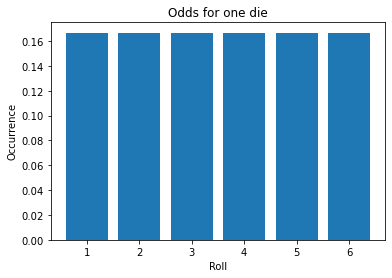

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}


In [8]:
plot(calc(d6), "Odds for one die")

### 1 die with advantage

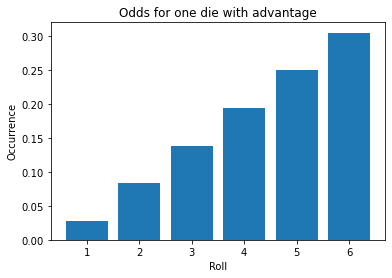

{1: 0.027777777777777776,
 2: 0.08333333333333333,
 3: 0.1388888888888889,
 4: 0.19444444444444445,
 5: 0.25,
 6: 0.3055555555555556}


In [9]:
plot(calc(d6, 1, advantage), "Odds for one die with advantage")

### 2 dice

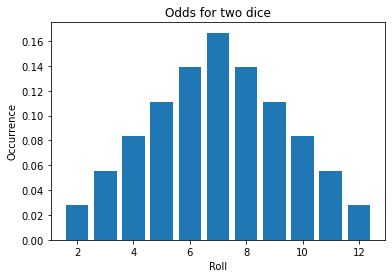

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}


In [10]:
plot(calc(d6, 2), "Odds for two dice")

### 2 dice with advantage

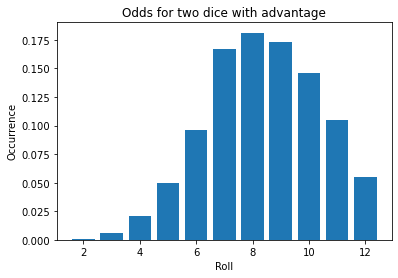

{2: 0.0007716049382716049,
 3: 0.006172839506172839,
 4: 0.020833333333333332,
 5: 0.04938271604938271,
 6: 0.09645061728395062,
 7: 0.16666666666666666,
 8: 0.18132716049382716,
 9: 0.1728395061728395,
 10: 0.14583333333333334,
 11: 0.10493827160493827,
 12: 0.05478395061728395}


In [11]:
plot(calc(d6, 2, advantage), "Odds for two dice with advantage")

### 4 dice

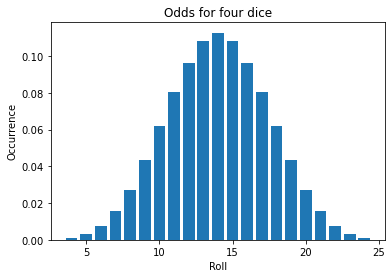

{4: 0.0007716049382716049,
 5: 0.0030864197530864196,
 6: 0.007716049382716049,
 7: 0.015432098765432098,
 8: 0.02700617283950617,
 9: 0.043209876543209874,
 10: 0.06172839506172839,
 11: 0.08024691358024691,
 12: 0.09645061728395062,
 13: 0.10802469135802469,
 14: 0.11265432098765432,
 15: 0.10802469135802469,
 16: 0.09645061728395062,
 17: 0.08024691358024691,
 18: 0.06172839506172839,
 19: 0.043209876543209874,
 20: 0.02700617283950617,
 21: 0.015432098765432098,
 22: 0.007716049382716049,
 23: 0.0030864197530864196,
 24: 0.0007716049382716049}


In [12]:
plot(calc(d6, 4), "Odds for four dice")

### 4 dice with advantage

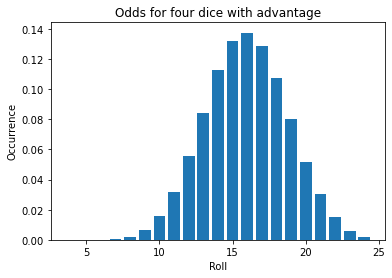

{4: 5.953741807651273e-07,
 5: 1.4288980338363054e-05,
 6: 0.00011907483615302546,
 7: 0.0005953741807651272,
 8: 0.002188000114311843,
 9: 0.0065348270080780365,
 10: 0.01581313824112178,
 11: 0.03195016003657979,
 12: 0.05544422058375248,
 13: 0.08418590916018899,
 14: 0.11265432098765432,
 15: 0.1318634735558604,
 16: 0.13745701398414875,
 17: 0.12854366712391405,
 18: 0.107643651882335,
 19: 0.07988492607834172,
 20: 0.0518243455647005,
 21: 0.03026882335009907,
 22: 0.015313023929279074,
 23: 0.006158550525834476,
 24: 0.0015426145023624447}


In [13]:
plot(calc(d6, 4, advantage), "Odds for four dice with advantage")